#Adaptado por Bruno Menezes (https://github.com/brunoleomenezes) e será utilizado apenas para fins acadêmicos.

In [1]:
#Importando módulos
import matplotlib.pyplot as plt
from matplotlib import patches
import numpy as np

import torch 
from torchvision import datasets, transforms

#Dada uma imagem qual o inteiro correspondente. Temos os rótulos 0 por exemplo e a imagem com o mesmo valor escrito a mão.

## Problemas de Classificação
<br>
http://yann.lecun.com/exdb/mnist/

O MNIST possui **10 classes**, os dígitos entre 0 e 9, como apresentado na imagem a seguir.

![](https://learnmachinelearning.files.wordpress.com/2017/08/mnist.png)

Disponível através da biblioteca ```torchvision```<br>
https://pytorch.org/docs/stable/torchvision/datasets.html#torchvision.datasets.MNIST


In [2]:
#Carregando dataset
# Onde salvar, não quero treino, quero tranformar para tensor
MNIST = datasets.MNIST('./',
                      train=False,
                      download=True,
                      transform=transforms.ToTensor())

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [3]:
MNIST[0] #array representando a imagem

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [4]:
#O rótulo é 7

In [5]:
dado, rotulo = MNIST[0]
print(type(dado), type(rotulo))

# Primeiro canal - Padrão do torch - 1 Canal de cor
print(dado.size()) # C x H x W

<class 'torch.Tensor'> <class 'int'>
torch.Size([1, 28, 28])


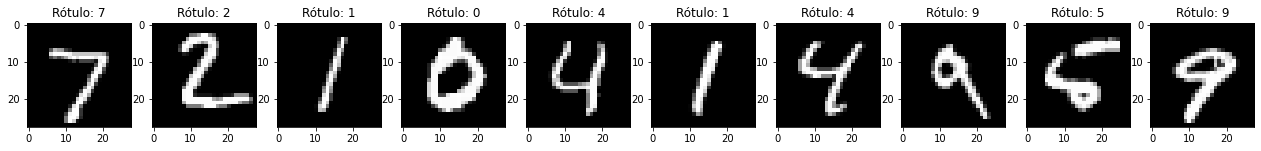

In [6]:
#imprimir os 10 primeiros elementos do dataset com o rótulo no título
fig, axs = plt.subplots(1,10, figsize=(22, 4))
for i in range(10):
  dado, rotulo = MNIST[i]
  axs[i].imshow(dado[0], cmap='gray')
  axs[i].set_title('Rótulo: ' + str(rotulo))
plt.show()

#Última camada deve ter o mesmo número de neurônios que desejamos classificar.

## Detecção

Dataset PascalVOC 2012:<br> 
http://host.robots.ox.ac.uk/pascal/VOC/voc2012/

Os dados de detecção podem ser encontrado no pacote Torchvision:<br>
https://pytorch.org/docs/stable/torchvision/datasets.html#torchvision.datasets.VOCDetection

In [9]:
VOC = datasets.VOCDetection('./', 
                             image_set='train', 
                             download=True, 
                             transform=transforms.ToTensor())

dado, rotulo = VOC[0]
print(type(dado), type(rotulo))

Using downloaded and verified file: ./VOCtrainval_11-May-2012.tar
Extracting ./VOCtrainval_11-May-2012.tar to ./
<class 'torch.Tensor'> <class 'dict'>


In [10]:
print(dado.size()) #442 x 500 com 3 canais de cores RGB

torch.Size([3, 442, 500])


Dimensionalidade: torch.Size([3, 442, 500])


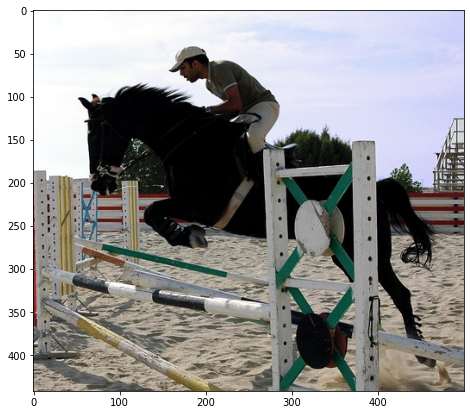

In [11]:
#Permutando dimensionalidade
print('Dimensionalidade:', dado.size())
dado, rotulo = VOC[0]
dado = dado.permute(1, 2, 0)

plt.figure(figsize=(8, 7) )
plt.imshow(dado)
plt.show()

In [12]:
rotulo

{'annotation': {'filename': '2008_000008.jpg',
  'folder': 'VOC2012',
  'object': [{'bndbox': {'xmax': '471',
     'xmin': '53',
     'ymax': '420',
     'ymin': '87'},
    'difficult': '0',
    'name': 'horse',
    'occluded': '1',
    'pose': 'Left',
    'truncated': '0'},
   {'bndbox': {'xmax': '289', 'xmin': '158', 'ymax': '167', 'ymin': '44'},
    'difficult': '0',
    'name': 'person',
    'occluded': '0',
    'pose': 'Unspecified',
    'truncated': '1'}],
  'segmented': '0',
  'size': {'depth': '3', 'height': '442', 'width': '500'},
  'source': {'annotation': 'PASCAL VOC2008',
   'database': 'The VOC2008 Database',
   'image': 'flickr'}}}

Definindo com base na geometria:
```python
xmax, xmin, ymax, ymin = rotulo['annotation']['object'][0]['bndbox'].values()
```

Visualizar o bounding box com ```patches``` do matplotlib
```
rect = patches.Rectangle((xmin, ymin),w,h)
```

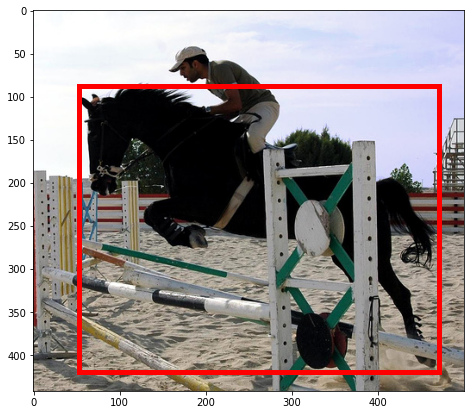

In [ ]:
bbox = rotulo['annotation']['object'][0]['bndbox']
xmax = int(bbox['xmax']) 
xmin = int(bbox['xmin']) 
ymax = int(bbox['ymax'])
ymin = int(bbox['ymin'])

fig, ax = plt.subplots(figsize=(8, 7))
plt.imshow(dado)

rect = patches.Rectangle((xmin, ymin), xmax-xmin , ymax-ymin, fill=False, linewidth=5, edgecolor='r')
ax.add_patch(rect)

plt.show()

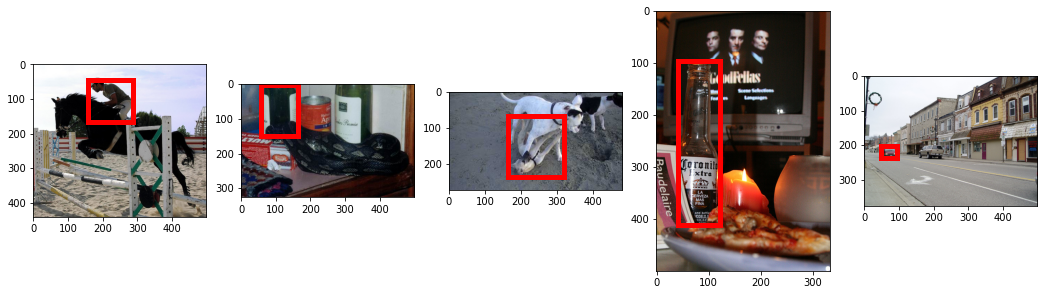

In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(18, 7))
for i in range(5):
  dado, rotulo = coco[i]
  dado = dado.permute(1, 2, 0)

  bbox = rotulo['annotation']['object'][1]['bndbox']
  xmax = int(bbox['xmax']) 
  xmin = int(bbox['xmin']) 
  ymax = int(bbox['ymax'])
  ymin = int(bbox['ymin'])

  axs[i].imshow(dado)

  rect = patches.Rectangle((xmin, ymin), xmax-xmin , ymax-ymin, fill=False, linewidth=5, edgecolor='r')
  axs[i].add_patch(rect)

#Cada neurônio será correspondente aos xmin, xmax, ymin e ymax. Os mesmos devem fazer uma regressão, onde cada valor deve corresponder a um dos valores citados anteriormente. 